Solución analítica del trabajo: 8.000000 J

n = 6:
  Trabajo aproximado: 8.000000 J
  Error absoluto: 8.881784e-16 J

n = 10:
  Trabajo aproximado: 8.000000 J
  Error absoluto: 8.881784e-16 J

n = 20:
  Trabajo aproximado: 8.000000 J
  Error absoluto: 8.881784e-16 J

n = 30:
  Trabajo aproximado: 8.000000 J
  Error absoluto: 8.881784e-16 J



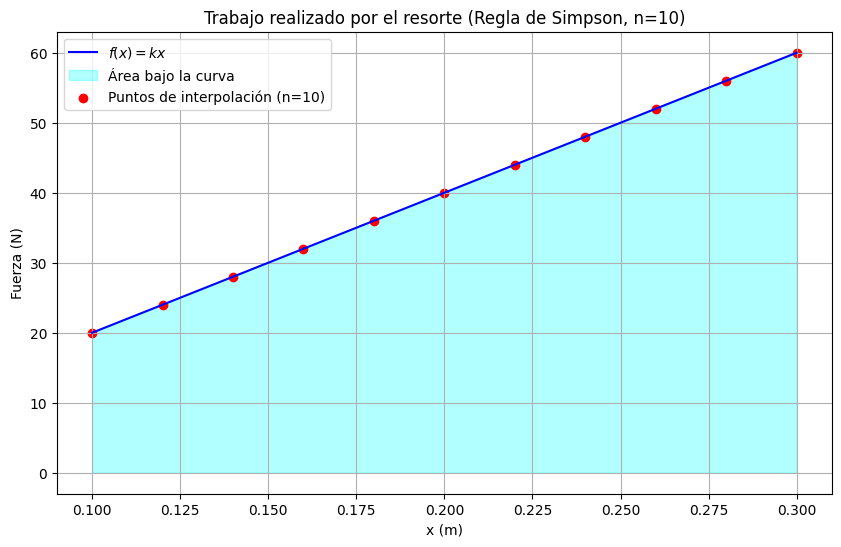

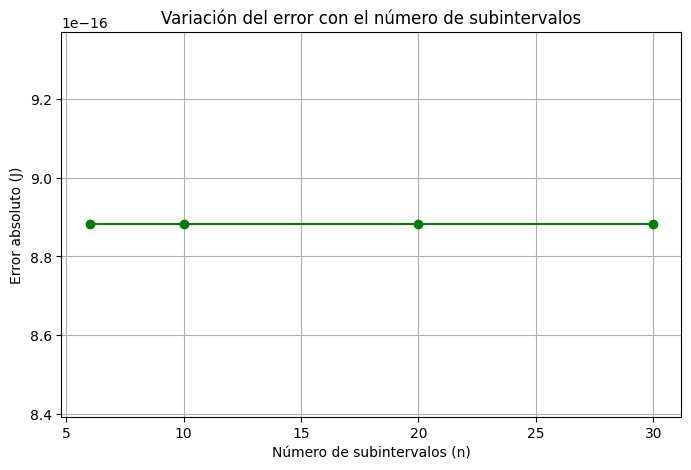

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simpson_rule(f, a, b, n):
    """Aproxima la integral de f(x) en [a, b] usando la regla de Simpson."""
    if n % 2 == 1:
        raise ValueError("El número de subintervalos (n) debe ser par.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)  # Puntos del intervalo
    fx = f(x)  # Evaluamos la función en esos puntos

    # Regla de Simpson
    integral = (h / 3) * (fx[0] + 2 * np.sum(fx[2:n:2]) + 4 * np.sum(fx[1:n:2]) + fx[n])

    return integral

# Función del resorte: W = ∫kx dx
def trabajo_resorte(x):
    k = 200  # Constante del resorte en N/m
    return k * x

# Parámetros del problema
a, b = 0.1, 0.3  # Intervalo en metros
n_values = [6, 10, 20, 30]  # Valores de n a probar

# Solución analítica
def trabajo_analitico(a, b):
    k = 200
    return 0.5 * k * (b**2 - a**2)

W_analitico = trabajo_analitico(a, b)
print(f"Solución analítica del trabajo: {W_analitico:.6f} J\n")

# Tabla para almacenar resultados
resultados = []

# Calcular para cada n
for n in n_values:
    W_aprox = simpson_rule(trabajo_resorte, a, b, n)
    error = abs(W_aprox - W_analitico)
    resultados.append((n, W_aprox, error))

    print(f"n = {n}:")
    print(f"  Trabajo aproximado: {W_aprox:.6f} J")
    print(f"  Error absoluto: {error:.6e} J")
    print()

# Gráfica de la función y la aproximación con n=10 (como ejemplo)
x_vals = np.linspace(a, b, 100)
y_vals = trabajo_resorte(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r"$f(x) = kx$", color="blue")
plt.fill_between(x_vals, y_vals, alpha=0.3, color="cyan", label="Área bajo la curva")
plt.scatter(np.linspace(a, b, 11), trabajo_resorte(np.linspace(a, b, 11)),
            color="red", label="Puntos de interpolación (n=10)")
plt.xlabel("x (m)")
plt.ylabel("Fuerza (N)")
plt.legend()
plt.title("Trabajo realizado por el resorte (Regla de Simpson, n=10)")
plt.grid()

# Guardar la figura
plt.savefig("trabajo_resorte.png")
plt.show()

# Gráfica del error vs n
plt.figure(figsize=(8, 5))
n_list = [r[0] for r in resultados]
error_list = [r[2] for r in resultados]

plt.plot(n_list, error_list, 'o-', color='green')
plt.xlabel("Número de subintervalos (n)")
plt.ylabel("Error absoluto (J)")
plt.title("Variación del error con el número de subintervalos")
plt.grid()
plt.savefig("error_trabajo_resorte.png")
plt.show()

Solución analítica de la carga: 0.0004999773 C

n = 6:
  Carga aproximada: 0.0005159318 C
  Error absoluto: 1.595e-05 C

n = 10:
  Carga aproximada: 0.0005024558 C
  Error absoluto: 2.478e-06 C

n = 20:
  Carga aproximada: 0.0005001459 C
  Error absoluto: 1.686e-07 C

n = 30:
  Carga aproximada: 0.0005000111 C
  Error absoluto: 3.384e-08 C



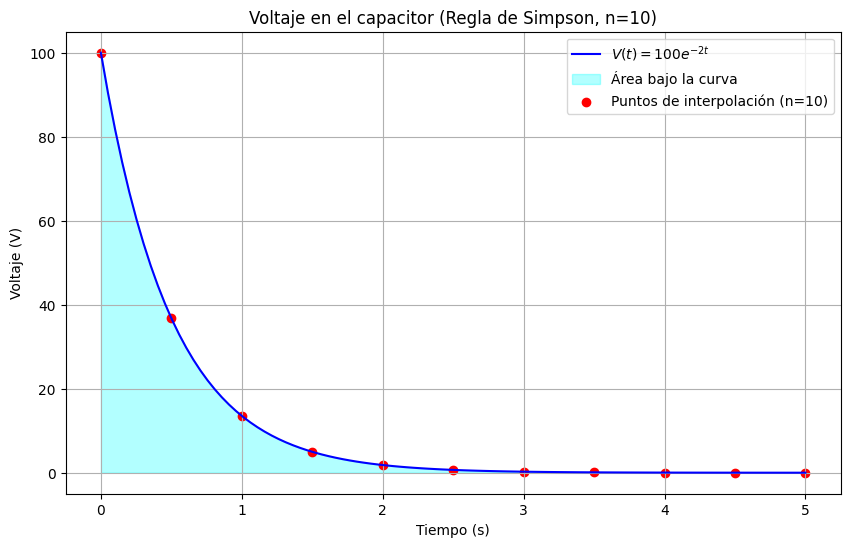

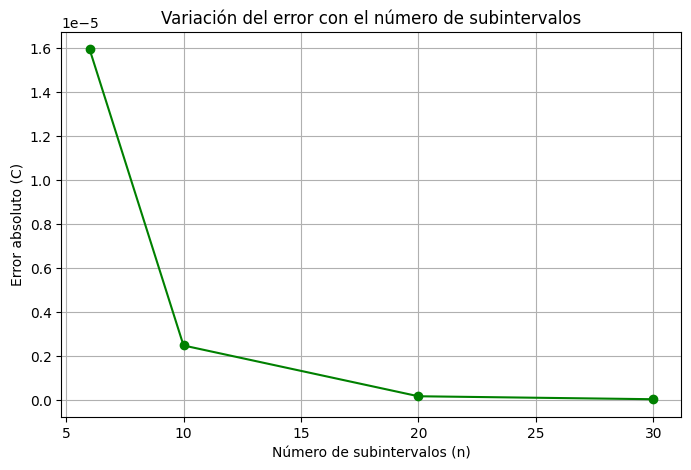

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def simpson_rule(f, a, b, n):
    """Aproxima la integral de f(x) en [a, b] usando la regla de Simpson."""
    if n % 2 == 1:
        raise ValueError("El número de subintervalos (n) debe ser par.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)  # Puntos del intervalo
    fx = f(x)  # Evaluamos la función en esos puntos

    # Regla de Simpson
    integral = (h / 3) * (fx[0] + 2 * np.sum(fx[2:n:2]) + 4 * np.sum(fx[1:n:2]) + fx[n])

    return integral

# Función del voltaje: V(t) = 100e^(-2t)
def voltaje(t):
    return 100 * np.exp(-2 * t)

# Parámetros del problema
C = 10e-6  # Capacitancia en Faradios
T = 5     # Tiempo final en segundos
n_values = [6, 10, 20, 30]  # Valores de n a probar

# Solución analítica
def carga_analitica(T):
    return C * 100 * (1 - np.exp(-2 * T)) / 2

Q_analitico = carga_analitica(T)
print(f"Solución analítica de la carga: {Q_analitico:.10f} C\n")

# Tabla para almacenar resultados
resultados = []

# Calcular para cada n
for n in n_values:
    Q_aprox = C * simpson_rule(voltaje, 0, T, n)
    error = abs(Q_aprox - Q_analitico)
    resultados.append((n, Q_aprox, error))

    print(f"n = {n}:")
    print(f"  Carga aproximada: {Q_aprox:.10f} C")
    print(f"  Error absoluto: {error:.3e} C")
    print()

# Gráfica de la función y la aproximación con n=10 (como ejemplo)
t_vals = np.linspace(0, T, 100)
V_vals = voltaje(t_vals)

plt.figure(figsize=(10, 6))
plt.plot(t_vals, V_vals, label=r"$V(t) = 100e^{-2t}$", color="blue")
plt.fill_between(t_vals, V_vals, alpha=0.3, color="cyan", label="Área bajo la curva")
plt.scatter(np.linspace(0, T, 11), voltaje(np.linspace(0, T, 11)),
            color="red", label="Puntos de interpolación (n=10)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.legend()
plt.title("Voltaje en el capacitor (Regla de Simpson, n=10)")
plt.grid()

# Guardar la figura
plt.savefig("voltaje_capacitor.png")
plt.show()

# Gráfica del error vs n
plt.figure(figsize=(8, 5))
n_list = [r[0] for r in resultados]
error_list = [r[2] for r in resultados]

plt.plot(n_list, error_list, 'o-', color='green')
plt.xlabel("Número de subintervalos (n)")
plt.ylabel("Error absoluto (C)")
plt.title("Variación del error con el número de subintervalos")
plt.grid()
plt.savefig("error_carga_capacitor.png")
plt.show()

Solución analítica del flujo de calor: -100.000000 W

n = 6:
  Flujo de calor aproximado: -100.000000 W
  Error absoluto: 0.000e+00 W

n = 10:
  Flujo de calor aproximado: -100.000000 W
  Error absoluto: 0.000e+00 W

n = 20:
  Flujo de calor aproximado: -100.000000 W
  Error absoluto: 0.000e+00 W

n = 30:
  Flujo de calor aproximado: -100.000000 W
  Error absoluto: 0.000e+00 W



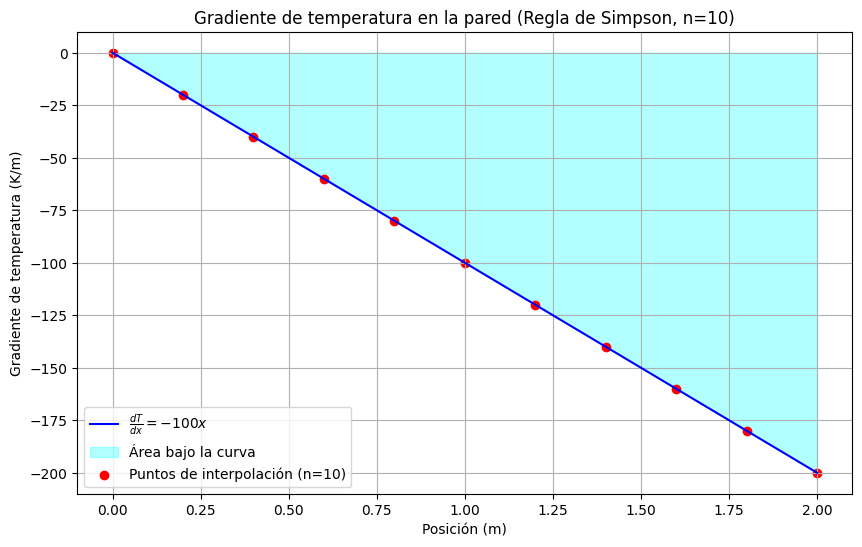

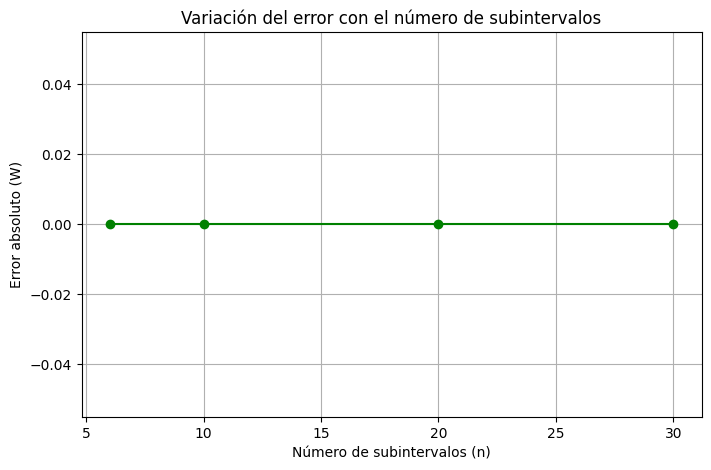

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def simpson_rule(f, a, b, n):
    """Aproxima la integral de f(x) en [a, b] usando la regla de Simpson."""
    if n % 2 == 1:
        raise ValueError("El número de subintervalos (n) debe ser par.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)  # Puntos del intervalo
    fx = f(x)  # Evaluamos la función en esos puntos

    # Regla de Simpson
    integral = (h / 3) * (fx[0] + 2 * np.sum(fx[2:n:2]) + 4 * np.sum(fx[1:n:2]) + fx[n])

    return integral

# Función para dT/dx (derivada de T(x) = 300 - 50x^2)
def derivada_temperatura(x):
    return -100 * x  # Derivada de 300 - 50x^2

# Parámetros del problema
k = 0.5  # Conductividad térmica en W/(m·K)
x1, x2 = 0, 2  # Intervalo en metros
n_values = [6, 10, 20, 30]  # Valores de n a probar

# Solución analítica
def flujo_analitico(x1, x2):
    return k * (300 - 50*x2**2 - (300 - 50*x1**2))

Q_analitico = flujo_analitico(x1, x2)
print(f"Solución analítica del flujo de calor: {Q_analitico:.6f} W\n")

# Tabla para almacenar resultados
resultados = []

# Calcular para cada n
for n in n_values:
    Q_aprox = k * simpson_rule(derivada_temperatura, x1, x2, n)
    error = abs(Q_aprox - Q_analitico)
    resultados.append((n, Q_aprox, error))

    print(f"n = {n}:")
    print(f"  Flujo de calor aproximado: {Q_aprox:.6f} W")
    print(f"  Error absoluto: {error:.3e} W")
    print()

# Gráfica de la función y la aproximación con n=10 (como ejemplo)
x_vals = np.linspace(x1, x2, 100)
dTdx_vals = derivada_temperatura(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, dTdx_vals, label=r"$\frac{dT}{dx} = -100x$", color="blue")
plt.fill_between(x_vals, dTdx_vals, alpha=0.3, color="cyan", label="Área bajo la curva")
plt.scatter(np.linspace(x1, x2, 11), derivada_temperatura(np.linspace(x1, x2, 11)),
            color="red", label="Puntos de interpolación (n=10)")
plt.xlabel("Posición (m)")
plt.ylabel("Gradiente de temperatura (K/m)")
plt.legend()
plt.title("Gradiente de temperatura en la pared (Regla de Simpson, n=10)")
plt.grid()

# Guardar la figura
plt.savefig("gradiente_temperatura.png")
plt.show()

# Gráfica del error vs n
plt.figure(figsize=(8, 5))
n_list = [r[0] for r in resultados]
error_list = [r[2] for r in resultados]

plt.plot(n_list, error_list, 'o-', color='green')
plt.xlabel("Número de subintervalos (n)")
plt.ylabel("Error absoluto (W)")
plt.title("Variación del error con el número de subintervalos")
plt.grid()
plt.savefig("error_flujo_calor.png")
plt.show()